In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

Basic Stats

In [2]:
with open('documents.csv') as en1k:
    documentReader = csv.DictReader(en1k)
    numOfDocs = 0
    numOfWords = 0
    uniqueWords = {}
    uniqueWordsGrowth = [0]
    uniqueWordChars = 0
    wordChars = 0

    for document in documentReader:
        numOfDocs += 1
        words = document['text_right'].split()
        docId = document["id_right"]
        numOfWords += len(words)
        
        for word in words:
            if word not in uniqueWords:
                uniqueWordChars += len(word)
                uniqueWords[word] = 0
            else:
                uniqueWords[word] += 1
            wordChars += len(word)
        
        uniqueWordsGrowth.append(len(uniqueWords))

    averageWordsPerDoc = numOfWords / numOfDocs
    numOfUniqueWords = len(uniqueWords)
    averageWordLen = wordChars / numOfWords
    averageUniqueWordLen = uniqueWordChars / numOfUniqueWords

    print("Total num of documents: " + str(numOfDocs))
    print("Average words per doc: " + str(averageWordsPerDoc))
    print("Total num of unique words: " + str(numOfUniqueWords))
    print("Average length of unique word: " + str(averageUniqueWordLen))
    print("Total num of words: " + str(numOfWords))
    print("Average length of word: " + str(averageWordLen))
    

Total num of documents: 369721
Average words per doc: 197.69969517555128
Total num of unique words: 794568
Average length of unique word: 7.714459932944695
Total num of words: 73093729
Average length of word: 4.795127048450353


Top 30 frequent words

In [3]:
sortedDict = dict(sorted(uniqueWords.items(), key = lambda x: x[1], reverse=True))
topUniqueWords = list(sortedDict.keys())[0:30]
print(topUniqueWords)

['the', 'of', 'in', 'and', 'a', 'to', 'was', 'he', 'is', 'as', 'for', 'on', 'with', 'by', 's', 'at', 'his', 'from', 'it', 'that', 'an', 'which', 'first', 'are', 'were', 'has', 'also', 'she', 'after', 'its']


i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves
what

The plot of ranks & collection frequencies in log-log coordinates

/var/folders/dt/073m265n33vcmnlyl34zcxfm0000gn/T/ipykernel_58602/1334027771.py:2: RuntimeWarning: divide by zero encountered in log10
  logOfFreq = np.log10(freequencyList)
/var/folders/dt/073m265n33vcmnlyl34zcxfm0000gn/T/ipykernel_58602/1334027771.py:3: RuntimeWarning: divide by zero encountered in log10
  logOfRanks = np.log10(list(range(0, len(sortedDict))))


Text(0.5, 1.0, 'The plot of ranks & collection frequencies in log-log coordinates')

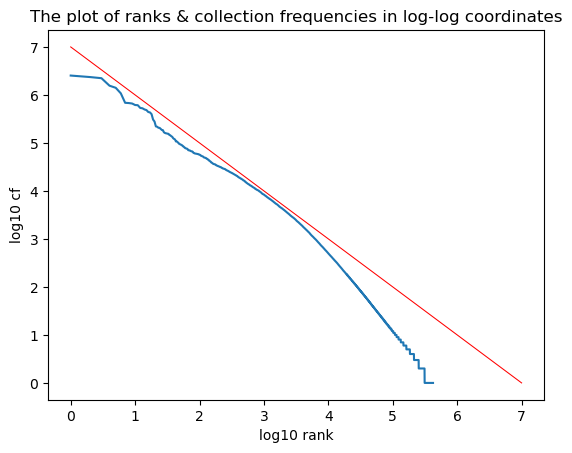

In [5]:
freequencyList = list(sortedDict.values())
logOfFreq = np.log10(freequencyList)
logOfRanks = np.log10(list(range(0, len(sortedDict))))
x = list(range(0, 8))
plt.plot(logOfRanks, logOfFreq)
plt.plot(x, x[::-1], color="red", linewidth=0.75)
plt.xlabel("log10 rank")
plt.ylabel("log10 cf")
plt.title("The plot of ranks & collection frequencies in log-log coordinates")


The plot of vocabulary growth (unique words) in log-log coordinates

/var/folders/dt/073m265n33vcmnlyl34zcxfm0000gn/T/ipykernel_58602/3180549901.py:1: RuntimeWarning: divide by zero encountered in log10
  logOfWords = np.log10(uniqueWordsGrowth)
/var/folders/dt/073m265n33vcmnlyl34zcxfm0000gn/T/ipykernel_58602/3180549901.py:2: RuntimeWarning: divide by zero encountered in log10
  logOfDocs = np.log10(list(range(0, numOfDocs + 1)))


Text(0.5, 1.0, 'The plot of vocabulary growth (unique words) in log-log coordinates')

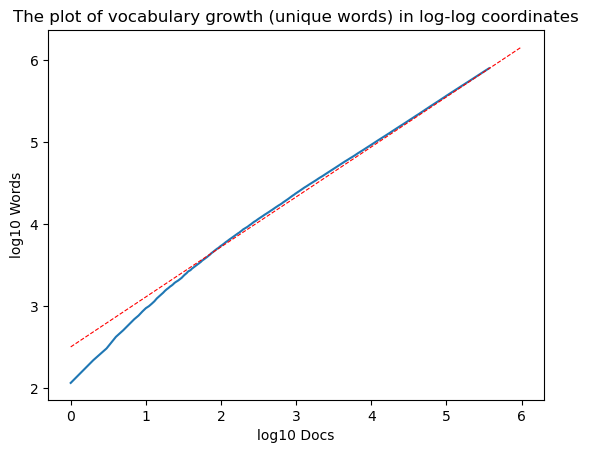

In [6]:
logOfWords = np.log10(uniqueWordsGrowth)
logOfDocs = np.log10(list(range(0, numOfDocs + 1)))
x = list(range(0, 7))
y = [0.61 * i + 2.5 for i in x]
plt.plot(logOfDocs, logOfWords)
plt.plot(x, y, linestyle="dashed", linewidth=0.8, color="red")
plt.xlabel("log10 Docs")
plt.ylabel("log10 Words")
plt.title("The plot of vocabulary growth (unique words) in log-log coordinates")